<div align="left">
<h4><a href="index.ipynb">RETURN TO INDEX</a></h4>
</div>
<div align="center">
<h1><a href="index.ipynb">DH3501: Advanced Social Networks</a><br/><br/><em>Class 5</em>: NetworkX and Centrality</h1>
</div>

<div style="float:left">
<b>Western University</b><br/>
<b>Department of Modern Languages and Literatures</b><br/>
<b>Digital Humanities – DH 3501</b><br/>
<br/>
<b>Instructor</b>: David Brown<br/>
<b>E-mail</b>: <a href="mailto:dbrow52@uwo.ca">dbrow52@uwo.ca</a><br/>
<b>Office</b>: AHB 1R14<br/>
</div>
<div style="float:left">
<img style="width:200px; margin-left:100px" src="http://www.bsr.org/images/blog/networks.jpg" />
</div>

## So...impressions on the NetworkX API...Hard? Easy? Let's go over the basics.

In [1]:
# Usually we import networkx as nx.
import networkx as nx

# Instantiate a graph.
g = nx.Graph()

# Add a node.
g.add_node(1)

# Add a list of nodes.
g.add_nodes_from([2, 3, 4, 5])

# Add an edge.
g.add_edge(1, 2)

# Add a list of edges.
g.add_edges_from([(2, 3), (3, 4)])

# Remove a node.
g.remove_node(5)

**What about removing an edge? Multiple nodes? Multiple edges? All nodes and edges?** Use the following cell to figure out how to delete nodes and edges and to clear the entire graph.

In [2]:
# Your code goes here.

**What happens if we add multiple nodes with the same name?**

In [3]:
g.add_edges_from([(1,2),(1,3)])
g.add_node(1)
g.add_edge(1,2)
g.add_node("spam")       # adds node "spam"
g.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [4]:
# Do you remember how to look at the nodes in the graph? How about the edges?
# Your code goes here.

## Node and edge attributes

In [5]:
g.add_node(4, {"name": "Joebob"})
g.node[4]

{'name': 'Joebob'}

In [6]:
g.node[4]["name"] = "Dave"
g.node[4]["job"] = "Ph.D. Student"
g.node[4]

{'job': 'Ph.D. Student', 'name': 'Dave'}

In [7]:
# Add an edge with attributes.
g.add_edge("s", "p", {"type": "knows"})
g["s"]["p"]

{'type': 'knows'}

In [8]:
g["s"]["p"]["type"] = "follows"
g["s"]["p"]["weight"] = 1
g["s"]["p"]

{'type': 'follows', 'weight': 1}

## Graph generators

In [9]:
rand = nx.gnp_random_graph(20, 0.25)
sf = nx.scale_free_graph(20)

## Drawing

In [10]:
# Config environment visualization.
%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = 17, 12

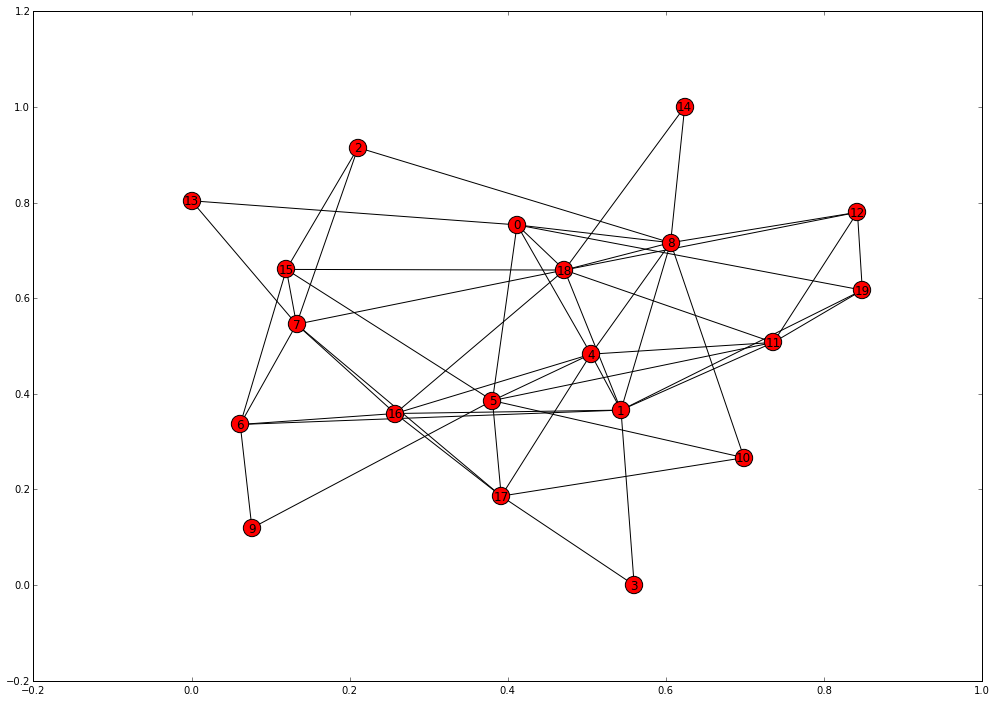

In [11]:
nx.draw_networkx(rand)

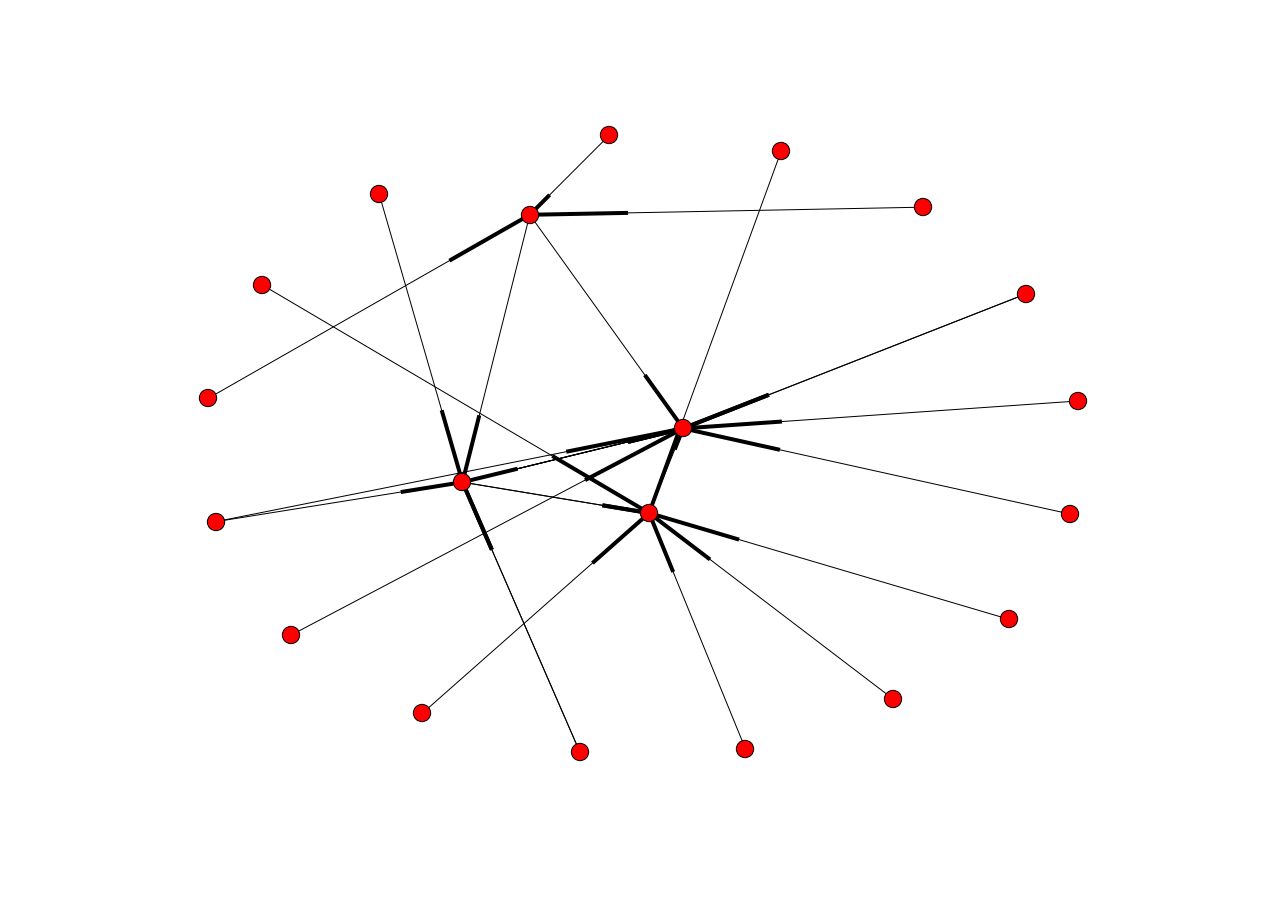

In [12]:
nx.draw(sf)

## Analytics

NetworkX has **tons** of analytics algorithms ready to go out of the box. There are too many to go over in class, but we'll be seeing them throughout the term. Today, we will focus on the concpet of centrality, how it is measured, and how it is interpreted.

## Centrality

Centrality is a micro measure that compares a node to all of the other nodes in the network. It is a way to measure the power, influence, and overall importance of a node in a network. However, it is important to remember that measures of centrality must be interpreted within the context of the network i.e., a measure of centrality does not have the same connotations for every network. 

There are **four main groups** or types of centrality measurement:

* **Degree** - how connected is a node (how many adjacent edges does it posses).
* **Closeness** - how close is a node to all of the other nodes in the graph, how easily can it access them.
* **Betweenness** - how important a node is in terms of connecting other nodes.
* **Neighbors characteristics** - how important or central a node's neighbors are.

In small groups, discuss the different measures of centrality in terms of how they were presented in T & K. What do these measure mean? What examples did they use in the book? Can you think of some of your own example of how these measures could be used and how you would interpret them?

<img style="float:left; width: 500px" src="http://4.bp.blogspot.com/-TiK9BLqwncU/T2xAGQVMiRI/AAAAAAAAYQ4/6X66VqxiO54/s1600/0familyphoto.png" />

### Degree Centrality

In [13]:
g = nx.scale_free_graph(50)
dc = nx.degree_centrality(g)
idc = nx.in_degree_centrality(g)
odc = nx.out_degree_centrality(g)

### Closeness Centrality

In [14]:
cc = nx.closeness_centrality(g)

### Betweenness Centrality

In [15]:
bc = nx.betweenness_centrality(g)

### Centrality summary

In [16]:
import pandas as pd
cent_df = pd.DataFrame({"deg": dc, "indeg": idc, "outdeg": odc, "close": cc, "betw": bc})
cent_df.describe()

,betw,close,deg,indeg,outdeg
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.003223,0.070292,0.077551,0.038776,0.038776
std,0.010941,0.023337,0.135184,0.112557,0.035766
min,0.000000,0.000000,0.020408,0.000000,0.000000
25%,0.000000,0.062272,0.020408,0.000000,0.020408
50%,0.000000,0.071429,0.020408,0.000000,0.020408
75%,0.000000,0.076923,0.061224,0.020408,0.040816
max,0.068240,0.113379,0.775510,0.632653,0.142857


## What's a histogram?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bfde2f3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2bfd77ca50>]], dtype=object)

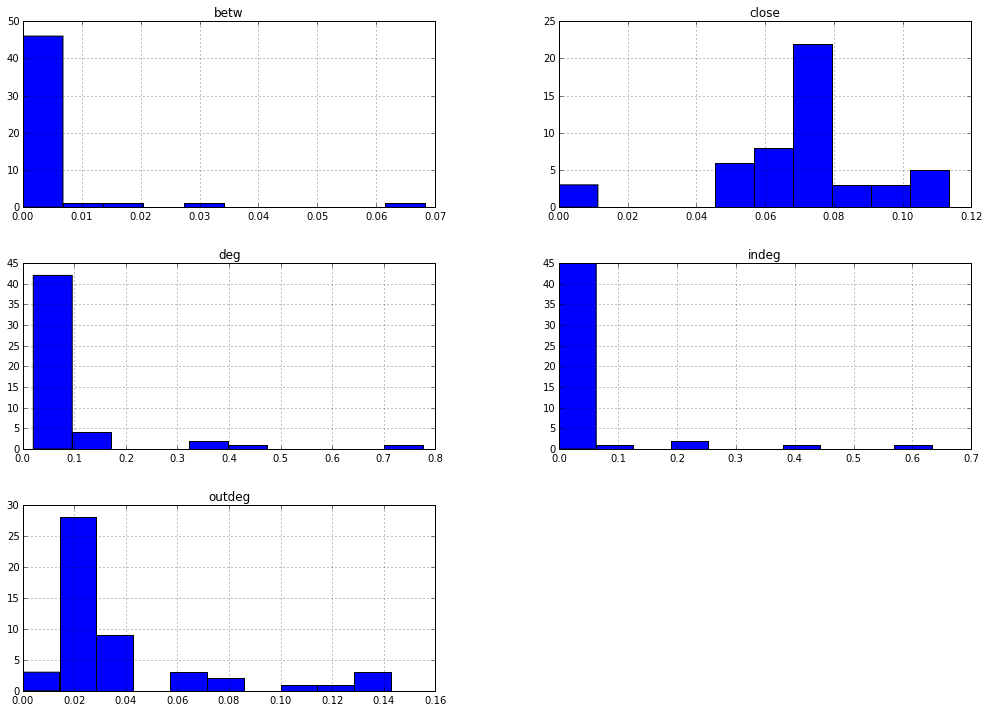

In [17]:
cent_df.hist()

## Other centrality measures

### Eigenvector centrality and the grey cardinal

What is a "grey cardinal"? What examples did they use in the book? Can you think of another figure from pop culture that would be a "grey cardinal"?

<img style="float:left; width: 500px" src="http://media.licdn.com/mpr/mpr/p/2/000/25e/2ca/294a129.jpg">

## Thought experiment: The meaning of degree centrality

Come up with a network representation for the data contained withing both Facebook and Twitter. Think of all of the possible content and all of the relationships that can exist between users and between users and content. Then answer the following questions:

* What does degree mean in each network?
* Does the meaning of degree depend on the type of edges counted?
* Are the relationships symetrical? Or would it be a directed network?
* If directed, what are the differences between in-degree and out-degree? What does it mean to have a high in- or out-degree?

## If there's time, let's get a start on class 6, there's a lot of material to cover!